### Assignment 1 (3 scores):

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

In [1]:
import numpy as np
import pandas as pd

#### Step 1: Load dataset




In [2]:
!wget https://archive.ics.uci.edu/static/public/162/forest+fires.zip -O forestfires.zip
!unzip forestfires.zip

--2025-10-01 11:04:29--  https://archive.ics.uci.edu/static/public/162/forest+fires.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘forestfires.zip’

forestfires.zip         [ <=>                ]   8.72K  --.-KB/s    in 0s      

2025-10-01 11:04:30 (77.0 MB/s) - ‘forestfires.zip’ saved [8932]

Archive:  forestfires.zip
  inflating: forestfires.csv         
  inflating: forestfires.names       


In [3]:
file_path = "forestfires.csv"

df = pd.read_csv(file_path)

display(df.head(20))

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


#### Step 2: Data preprocessing

In [4]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
# Áp dụng ánh xạ vào cột 'month'
df['month'] = df['month'].map(month_map)

day_map = {
    'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7, 'sun': 8
}
# Áp dụng ánh xạ vào cột 'day'
df['day'] = df['day'].map(day_map)

In [5]:
# Lưu lại tên các cột trước khi chuyển sang NumPy
feature_cols = df.drop('area', axis=1).columns.tolist()

Tách biến độc lập (x) và biến phụ thuộc (y)

In [6]:
# Biến phụ thuộc y là 'area', áp dụng log transformation để giảm độ lệch
y = np.log1p(df['area']).values

# Biến độc lập X là tất cả các cột còn lại
X = df.drop('area', axis=1).values

Tách tập train và test

In [7]:
X_y = np.c_[X, y]
N = X_y.shape[0]
train_size = int(N * 0.8)
np.random.seed(42)
np.random.shuffle(X_y)

X_y_train = X_y[:train_size]
X_y_test = X_y[train_size:]

In [8]:
X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
X_train.shape, X_test.shape

y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]
y_train.shape, y_test.shape

((413,), (104,))

In [9]:
X_train_final = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_final = np.c_[np.ones(X_test.shape[0]), X_test]

#### Step 3: Model Implementation

In [10]:
class LinearRegression:
  def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    delta = y - y_hat
    return np.square(delta).mean()**0.5

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    cov = np.matmul(X.T, X)
    inv_cov = np.linalg.inv(cov)
    #self.theta_: np.ndarray = np.matmul(inv_cov, np.matmul(X.T, y))
    self.theta_ : np.ndarray = inv_cov @ (X.T @ y)

  def predict(self, X: np.ndarray) -> np.ndarray:
    # y_pred = np.matmul(self.theta_.T, X) # Incorrect matrix multiplication
    y_pred = np.matmul(X, self.theta_) # Correct matrix multiplication
    return y_pred

In [11]:
'''class LinearRegression:
    def rmse(self, y_true, y_pred):
      return np.sqrt(np.mean(np.square(y_true - y_pred)))

    def r2_score(self, y_true, y_pred):
      ss_res = np.sum(np.square(y_true - y_pred))
      ss_tot = np.sum(np.square(y_true - np.mean(y_true)))
      return 1 - (ss_res / ss_tot)

    def __init__(self, learning_rate=0.001, iterations=20000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) # Khởi tạo trọng số bằng 0

        # Vòng lặp Gradient Descent
        for _ in range(self.iterations):
            # 1. Tính toán dự đoán
            predictions = X @ self.weights
            # 2. Tính toán lỗi
            errors = predictions - y
            # 3. Tính toán gradients
            gradients = (1 / n_samples) * X.T @ errors
            # 4. Cập nhật trọng số
            self.weights = self.weights - self.learning_rate * gradients
        return self

    def predict(self, X):
        return X @ self.weights
'''

'class LinearRegression:\n    def rmse(self, y_true, y_pred):\n      return np.sqrt(np.mean(np.square(y_true - y_pred)))\n\n    def r2_score(self, y_true, y_pred):\n      ss_res = np.sum(np.square(y_true - y_pred))\n      ss_tot = np.sum(np.square(y_true - np.mean(y_true)))\n      return 1 - (ss_res / ss_tot)\n\n    def __init__(self, learning_rate=0.001, iterations=20000):\n        self.learning_rate = learning_rate\n        self.iterations = iterations\n        self.weights = None\n\n    def fit(self, X, y):\n        n_samples, n_features = X.shape\n        self.weights = np.zeros(n_features) # Khởi tạo trọng số bằng 0\n\n        # Vòng lặp Gradient Descent\n        for _ in range(self.iterations):\n            # 1. Tính toán dự đoán\n            predictions = X @ self.weights\n            # 2. Tính toán lỗi\n            errors = predictions - y\n            # 3. Tính toán gradients\n            gradients = (1 / n_samples) * X.T @ errors\n            # 4. Cập nhật trọng số\n         

In [12]:

'''class LinearRegression:
    def rmse(self, y_true, y_pred):
      return np.sqrt(np.mean(np.square(y_true - y_pred)))

    def r2_score(self, y_true, y_pred):
      ss_res = np.sum(np.square(y_true - y_pred))
      ss_tot = np.sum(np.square(y_true - np.mean(y_true)))
      return 1 - (ss_res / ss_tot)

    """
    Mô hình Hồi quy Tuyến tính giải bằng Phương trình Chuẩn (OLS).
    """
    def __init__(self):
        # theta_ sẽ lưu các trọng số của mô hình sau khi huấn luyện
        self.theta_ = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Huấn luyện mô hình bằng công thức OLS (Normal Equation).
        Lưu ý: X phải là ma trận đã được thêm cột bias (cột số 1).

        Công thức: θ = (XᵀX)⁻¹Xᵀy
        """
        # np.linalg.inv() là hàm tính ma trận nghịch đảo (⁻¹)
        # @ là toán tử nhân ma trận
        # .T là chuyển vị (transpose)
        self.theta_ = np.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Đưa ra dự đoán trên dữ liệu mới.
        Lưu ý: X phải là ma trận đã được thêm cột bias.

        Công thức: y_pred = Xθ
        """
        # Kiểm tra xem mô hình đã được huấn luyện chưa
        if self.theta_ is None:
            raise Exception("Mô hình chưa được huấn luyện. Hãy gọi hàm .fit() trước.")

        return X @ self.theta_'''

'class LinearRegression:\n    def rmse(self, y_true, y_pred):\n      return np.sqrt(np.mean(np.square(y_true - y_pred)))\n\n    def r2_score(self, y_true, y_pred):\n      ss_res = np.sum(np.square(y_true - y_pred))\n      ss_tot = np.sum(np.square(y_true - np.mean(y_true)))\n      return 1 - (ss_res / ss_tot)\n\n    """\n    Mô hình Hồi quy Tuyến tính giải bằng Phương trình Chuẩn (OLS).\n    """\n    def __init__(self):\n        # theta_ sẽ lưu các trọng số của mô hình sau khi huấn luyện\n        self.theta_ = None\n\n    def fit(self, X: np.ndarray, y: np.ndarray) -> None:\n        """\n        Huấn luyện mô hình bằng công thức OLS (Normal Equation).\n        Lưu ý: X phải là ma trận đã được thêm cột bias (cột số 1).\n        \n        Công thức: θ = (XᵀX)⁻¹Xᵀy\n        """\n        # np.linalg.inv() là hàm tính ma trận nghịch đảo (⁻¹)\n        # @ là toán tử nhân ma trận\n        # .T là chuyển vị (transpose)\n        self.theta_ = np.linalg.inv(X.T @ X) @ (X.T @ y)\n\n    def predic

#### Step 4: Model training

In [13]:
print("\nStep 4: Bắt đầu huấn luyện mô hình...")

model = LinearRegression()
model.fit(X_train_final, y_train)

print("✅ Huấn luyện hoàn tất.")


Step 4: Bắt đầu huấn luyện mô hình...
✅ Huấn luyện hoàn tất.


#### Step 5: Model evaluation

In [14]:
# Dùng mô hình đã huấn luyện để dự đoán trên tập test
y_predictions = model.predict(X_test_final)

# Dùng phương thức .rmse() để tính toán chỉ số
rmse_score = model.rmse(y_test, y_predictions)

In [15]:
print("\n--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---")
print(f"Root Mean Squared Error (RMSE): {rmse_score:.4f}")


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
Root Mean Squared Error (RMSE): 1.2403


### Assignment 2 (3 scores):

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

chuẩn hóa dữ liệu khác với scale DL

trục X Y có hàm Gauss đi qua

X ^ = 0, phương sai bằng 1

biểu diễn 12 biến (12 tên cột), nhân với ma trận trọng số  (xem hình trong đt, hình thứ 2 kể từ ass2). Đặc trưng nào ít tác động đến model thì có beta cao hơn, và ngược lại.

Nếu 2 đặc trưng đồng tuyến tính fk <=> fi, thằng này tăng thằng kia cũng tăng, thì chỉ giữ lại 1 cột (vì nó ảnh hướng đến output như nhau)

Nếu đầu vào và đầu ra tương quan lẫn nhau fk <=> y thì nên đánh trọng số k cho đầu vào f


#### Data normalization

The OLS estimator of a linear regression model has the form

$$
    \hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X^T X \in \mathbb{R}^{K \times K}$ is called the normal matrix of the **Gram Matrix**.

Considering the convariance of $X$, we have

\begin{align}
    Cov(X)  & = \mathbb{E}[(X - \mathbb{E}[X])^2] \\
            & = \mathbb{E}[X^T X - 2 X^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X]] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X^T\mathbb{E}[X]] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X]^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - \mathbb{E}[X]^T \mathbb{E}[X] \\
\end{align}

In case we have $\mathbb{E}[X] = 0$, then $X^T X = Cov(X)$. The normalization helps we to have the numerical stability of the input, theoretically leads to stable calculation when being applied to unseen data.

#### Training on the original data

In [16]:
#Kết quả của thí nghiệm này là kết quả từ Assigment 1
rmse_orig = rmse_score

#### Training on standardized data

Chuẩn hóa các đặc trưng liên tục

In [17]:
# 1. Xác định các cột continuous và chỉ số của chúng
continuous_cols = ['FFMC', 'DMC', 'ISI', 'temp', 'wind', 'RH', 'DC', 'rain'] # Thêm RH, DC, rain vì chúng cũng là continuous
col_indices_to_standardize = [feature_cols.index(col) for col in continuous_cols]

# 2. Tạo bản sao để không thay đổi dữ liệu gốc
X_train_std = X_train.copy()
X_test_std = X_test.copy()

# 3. Tính mean và std CHỈ TRÊN CÁC CỘT CONTINUOUS của tập train
mean = X_train[:, col_indices_to_standardize].mean(axis=0)
std = X_train[:, col_indices_to_standardize].std(axis=0)

# 4. Áp dụng chuẩn hóa CHỈ VÀO CÁC CỘT CONTINUOUS
X_train_std[:, col_indices_to_standardize] = (X_train_std[:, col_indices_to_standardize] - mean) / std
X_test_std[:, col_indices_to_standardize] = (X_test_std[:, col_indices_to_standardize] - mean) / std

# 5. Thêm cột bias vào dữ liệu đã chuẩn hóa
X_train_std_final = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std_final = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

Huấn luyện và đánh giá mô hình trên dữ liệu đã chuẩn hóa

In [18]:
model_std = LinearRegression()
model_std.fit(X_train_std_final, y_train)
predictions_std = model_std.predict(X_test_std_final)

In [19]:
rmse_std = model_std.rmse(y_test, predictions_std)

#### So sánh kết quả

In [20]:
"""#### So sánh kết quả Assignment 2"""
print("\n" + "="*69)
print("📊 SO SÁNH KẾT QUẢ ASSIGNMENT 2")
print("="*69)
print(f"| {'Chỉ số':<12} | {'Dữ liệu Gốc (Từ Assgn 1)':<25} | {'Dữ liệu Chuẩn Hóa':<22} |")
print(f"|{'-'*14}|{'-'*27}|{'-'*24}|")

print(f"| {'RMSE':<12} | {rmse_orig:<25.4f} | {rmse_std:<22.4f} |")
print("="*69)


📊 SO SÁNH KẾT QUẢ ASSIGNMENT 2
| Chỉ số       | Dữ liệu Gốc (Từ Assgn 1)  | Dữ liệu Chuẩn Hóa      |
|--------------|---------------------------|------------------------|
| RMSE         | 1.2403                    | 1.2403                 |


In [21]:
# Trọng số mô hình trên dữ liệu gốc
print("Hệ số (theta) - Dữ liệu gốc:")
print(model.theta_)

# Trọng số mô hình trên dữ liệu chuẩn hóa
print("\nHệ số (theta) - Dữ liệu chuẩn hóa:")
print(model_std.theta_)

Hệ số (theta) - Dữ liệu gốc:
[ 0.22194731  0.05680366 -0.03496153  0.19171981  0.01534851  0.00133718
  0.00322618 -0.00152173 -0.02606477  0.00317821 -0.00736286  0.03687739
  0.15696517]

Hệ số (theta) - Dữ liệu chuẩn hóa:
[-0.49094216  0.05680366 -0.03496153  0.19171981  0.01534851  0.00780734
  0.20922055 -0.36987986 -0.12310036  0.01888049 -0.12228633  0.06496979
  0.050992  ]


- **Kết quả RMSE gần như không đổi**: Cả mô hình huấn luyện trên dữ liệu gốc và dữ liệu chuẩn hóa đều cho kết quả dự đoán tương tự nhau.

- **Nguyên nhân**: Do sử dụng Normal Equation trong Linear Regression. Với phương pháp này, việc chuẩn hóa không thay đổi bản chất nghiệm cuối cùng, nhưng:
+ Giúp các phép tính số học ổn định hơn (tránh ma trận điều kiện kém).
+ Làm cho hệ số hồi quy (θ) cân bằng hơn, dễ so sánh mức độ ảnh hưởng giữa các biến.

- **Ý nghĩa**: Việc chuẩn hóa không nhằm cải thiện trực tiếp RMSE, mà để đảm bảo mô hình bền vững, có khả năng áp dụng với dữ liệu mới.

- **Kết luận**: Kết quả tương đồng là hoàn toàn hợp lý. Việc chuẩn hóa vẫn cần thiết về mặt kỹ thuật, ngay cả khi chỉ số đánh giá không thay đổi rõ rệt.

---



### Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

In [22]:
continuous_cols

['FFMC', 'DMC', 'ISI', 'temp', 'wind', 'RH', 'DC', 'rain']

[1 số pp chọn lọc dl]

xem cái nào tương quan với nhau, vd độ ẩm vs nhiệt độ, lượng mưa vs độ ẩm

visualization heat map, cái nào càng nhỏ càng về tím, càng lớn càng về đỏ

#### On the Problem of Colinearity

As stated previously, the OLS of the linear regression model is achieved by assuming that $rank(X) = K$ or $det(X) \ne 0$. So that removing columns in $X$ having colinearity with other columns is to ensure that assumption of the full rank condition of $X$. In the case $det(X) = 0$, then the **Moore-Penrose inverse** will be applied to determine the pseudo-inverse matrix of $X^T X$.

#### Step 1: Feature Correlation Analysis

Để xác định các cột phụ thuộc tuyến tính, ta cần tính toán ma trận tương quan (corelation matrix) giữa các đặc trưng và trực quan hóa nó bằng heatmap.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

##### Pair Plot

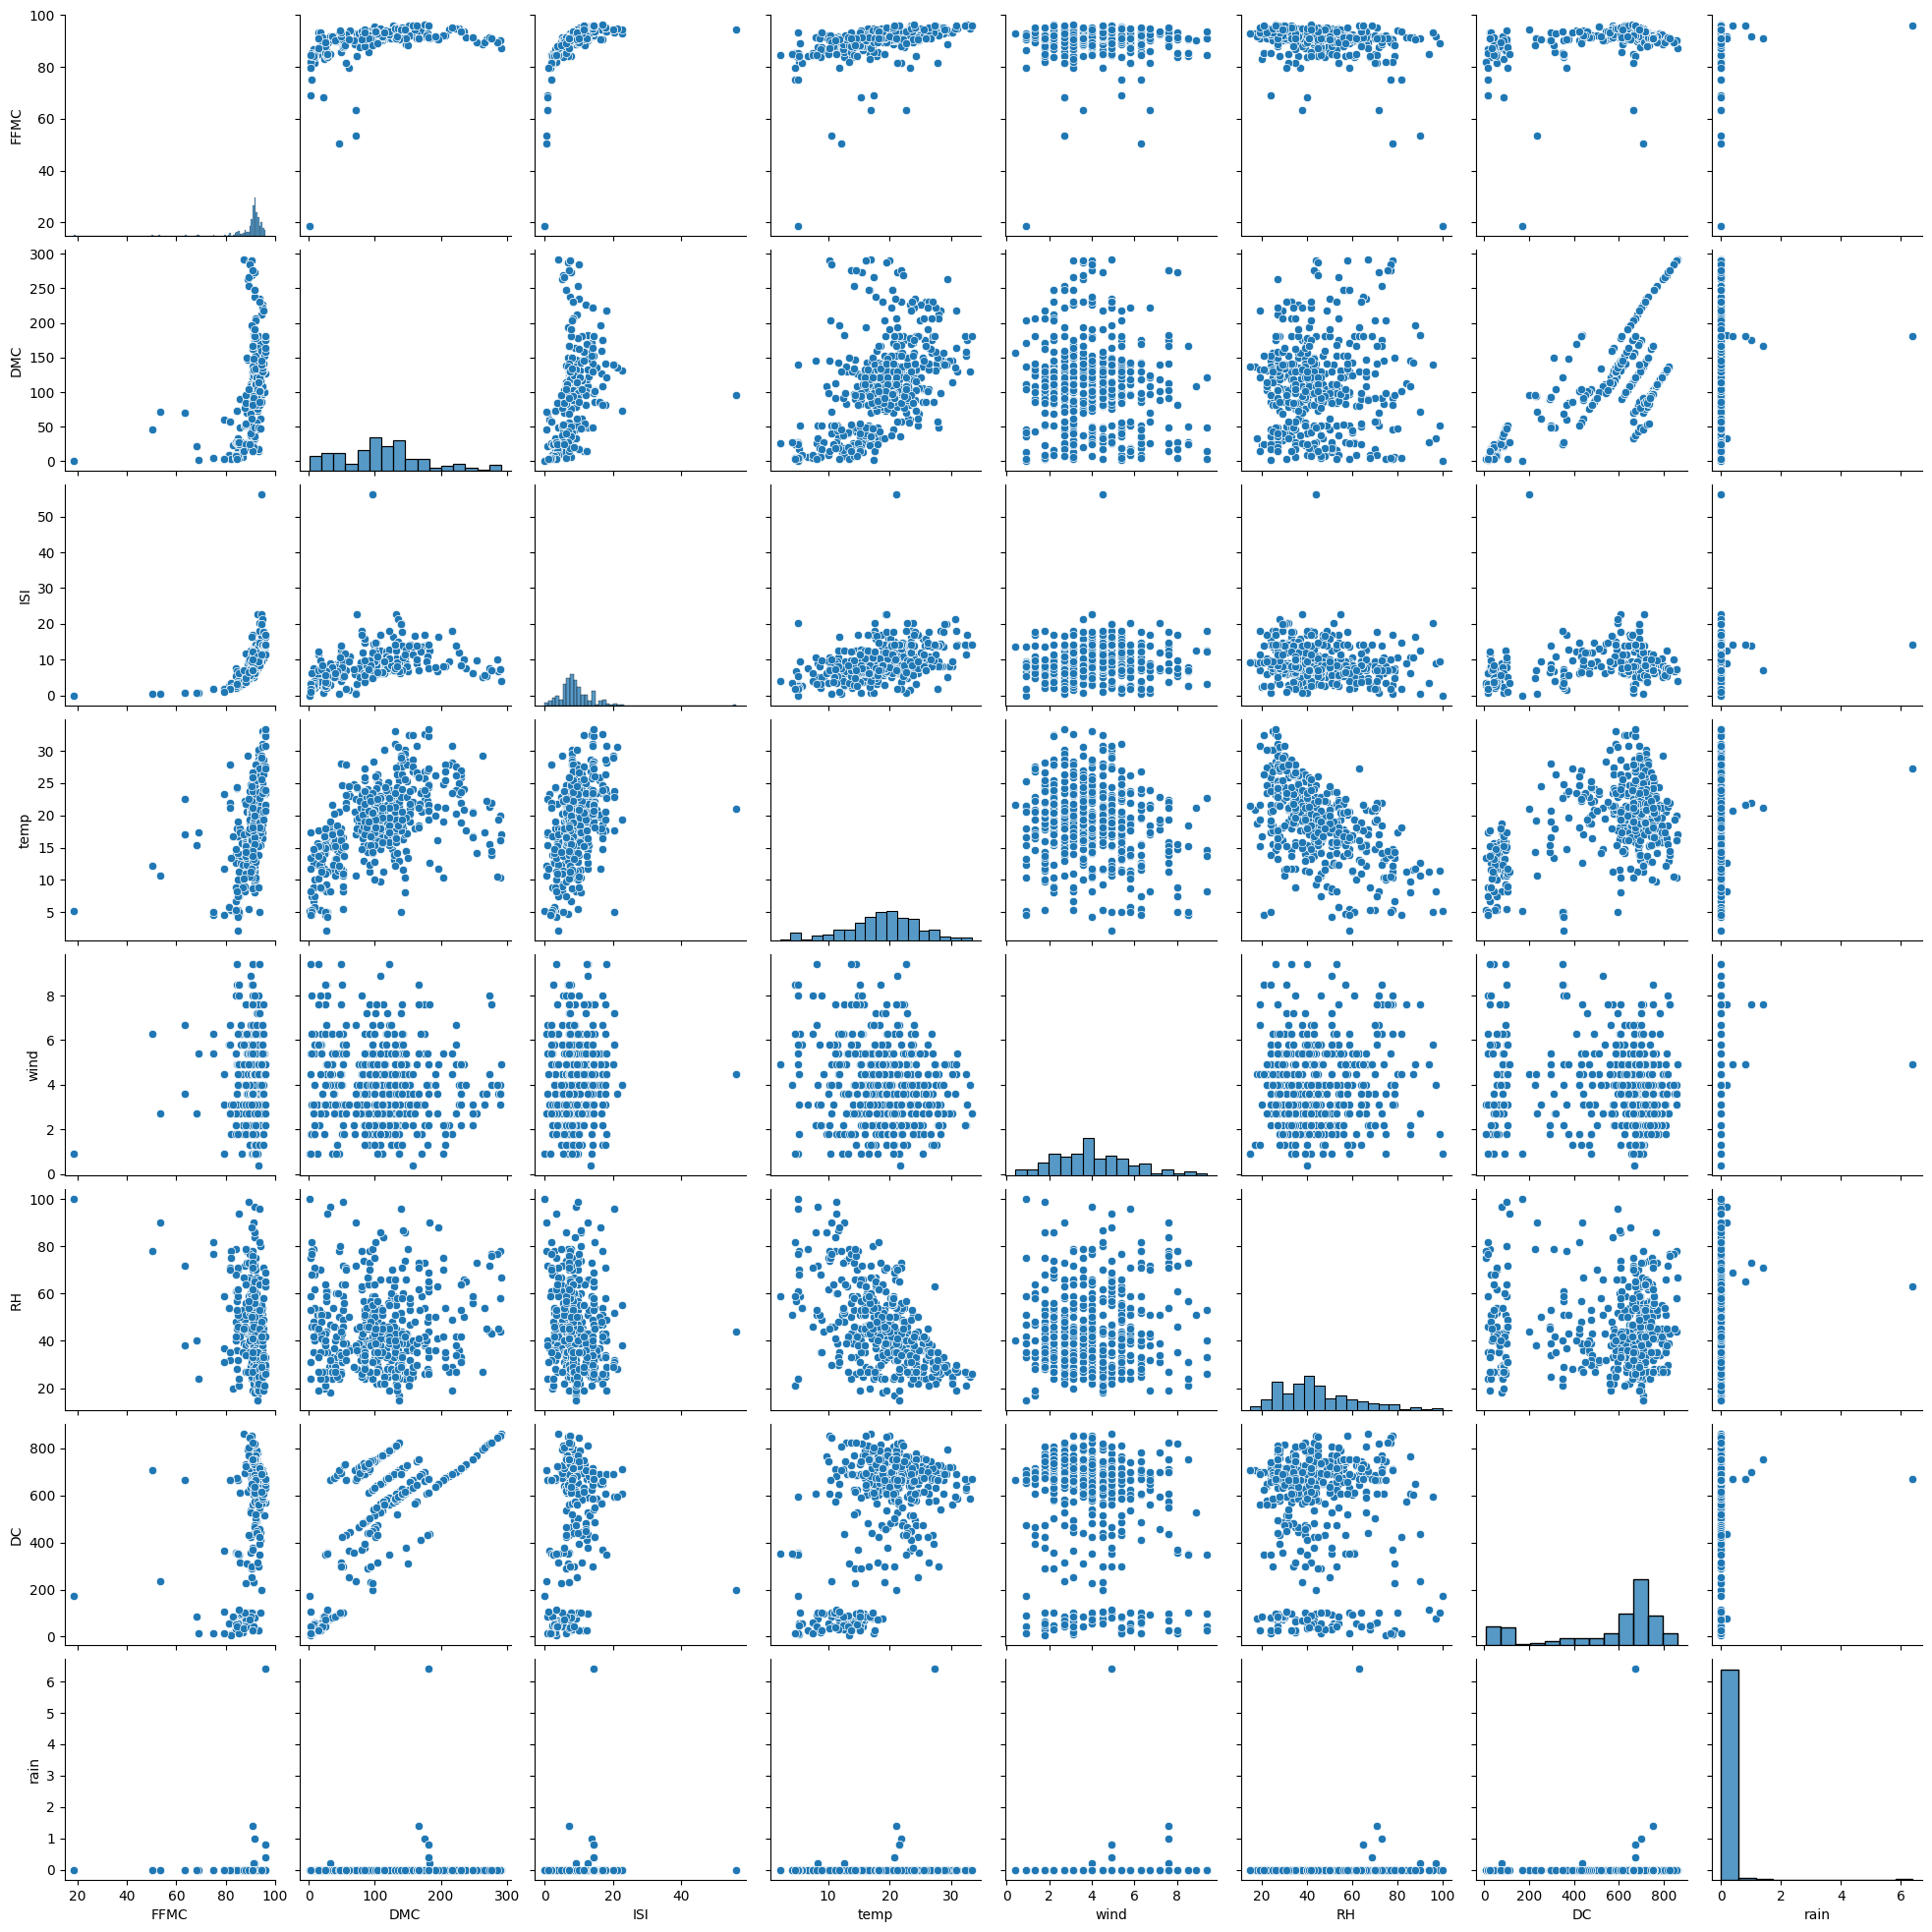

In [24]:
# Chọn các cột muốn kiểm tra mối quan hệ
continuous_cols = ['FFMC', 'DMC', 'ISI', 'temp', 'wind', 'RH', 'DC', 'rain']

# Vẽ biểu đồ pair plot
sns.pairplot(df[continuous_cols])

# Hiển thị biểu đồ
plt.show()

Quan sát ô thể hiện mối quan hệ giữa DMC và DC, ta thấy các điểm dữ liệu có xu hướng xếp thành một đường thẳng đi lên. Nghĩa là khi một biến tăng, biến kia cũng có xu hướng tăng --> Tương quan dương mạnh

##### Heatmap

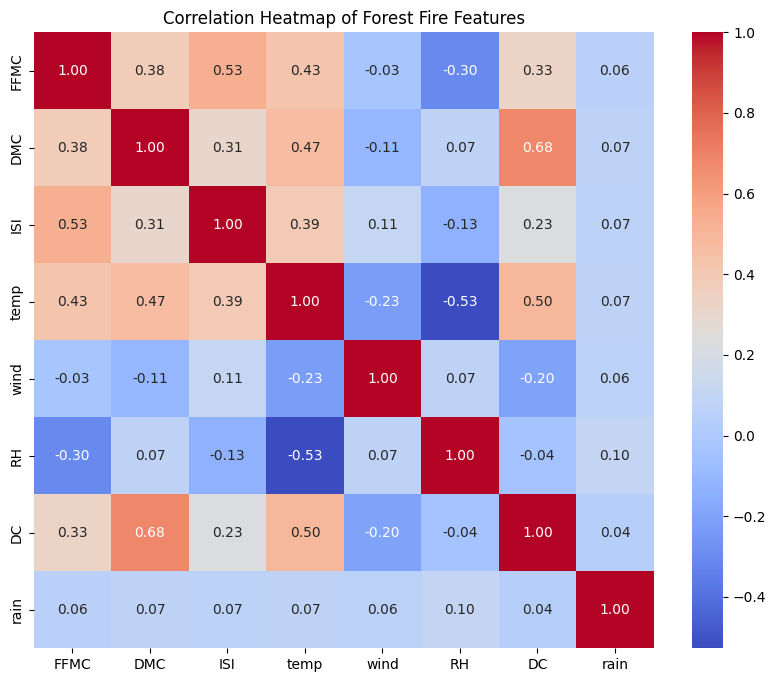

In [25]:
# Chọn các cột dữ liệu số liên tục để phân tích
data_for_corr = df[continuous_cols]

# Tính toán ma trận tương quan
correlation_matrix = data_for_corr.corr()

# Trực quan hóa ma trận bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Forest Fire Features')
plt.show()

#### Step 2: Interpretation and Feature Selection

Từ biểu đồ nhiệt, ta tìm kiếm các cặp đặc trưng có hệ số tương quan cao (giá trị tuyệt đối gần bằng 1)

Ta thấy cặp đặc trưng có tương quan dương mạnh nhất là **DMC** và **DC** với hệ số là 0.68. Dựa trên kết quả này, ta quyết định loại bỏ một trong hai đặc trưng để giảm thiểu hiện tượng phụ thuộc tuyến tính.

#### Step 3: Creating the New Preprocessed Dataset

Lập các tập X_train, X_test mới bằng cách loại bỏ cột **DC**

In [26]:
# Danh sách 'feature_cols' chứa tên các cột đặc trưng theo đúng thứ tự
print("Các cột đặc trưng ban đầu:", feature_cols)

# Tìm chỉ số (index) của cột 'DC' để loại bỏ
col_to_drop_index = feature_cols.index('DC')
print(f"Chỉ số của cột 'DC' sẽ bị loại bỏ: {col_to_drop_index}")

# Dùng np.delete để xóa cột tương ứng khỏi tập train và test
# axis=1 để chỉ định thao tác trên cột
X_train_fe = np.delete(X_train, col_to_drop_index, axis=1)
X_test_fe = np.delete(X_test, col_to_drop_index, axis=1)

print("\nKích thước của X_train trước khi xóa cột:", X_train.shape)
print("Kích thước của X_train sau khi xóa cột 'DC':", X_train_fe.shape)

# Thêm cột bias (cột toàn số 1) vào bộ dữ liệu mới
X_train_fe_final = np.c_[np.ones(X_train_fe.shape[0]), X_train_fe]
X_test_fe_final = np.c_[np.ones(X_test_fe.shape[0]), X_test_fe]

Các cột đặc trưng ban đầu: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
Chỉ số của cột 'DC' sẽ bị loại bỏ: 6

Kích thước của X_train trước khi xóa cột: (413, 12)
Kích thước của X_train sau khi xóa cột 'DC': (413, 11)


#### Step 4: Model Training and Evaluation

In [27]:
model_fe = LinearRegression()

model_fe.fit(X_train_fe_final, y_train)

predictions_fe = model_fe.predict(X_test_fe_final)

rmse_fe = model_fe.rmse(y_test, predictions_fe)

#### Step 5: Comparing Results and Conclusion

In [28]:
# Lấy kết quả từ mô hình gốc trong Assignment 1

# In bảng so sánh
print("\n" + "="*77)
print("📊 BẢNG SO SÁNH HIỆU SUẤT MÔ HÌNH")
print("="*77)
print(f"| {'Chỉ số':<15} | {'Dữ liệu Gốc (Tất cả đặc trưng)':<30} | {'Dữ liệu đã Xử lý (-DC)':<20} |")
print(f"|{'-'*17}|{'-'*32}|{'-'*24}|")
print(f"| {'RMSE':<15} | {rmse_orig:<30.4f} | {rmse_fe:<22.4f} |")
print("="*77)


📊 BẢNG SO SÁNH HIỆU SUẤT MÔ HÌNH
| Chỉ số          | Dữ liệu Gốc (Tất cả đặc trưng) | Dữ liệu đã Xử lý (-DC) |
|-----------------|--------------------------------|------------------------|
| RMSE            | 1.2403                         | 1.2366                 |


--> Việc loại bỏ đặc trưng phụ thuộc tuyến tính (DC) đã tạo ra một mô hình đơn giản và ổn định hơn, đạt được kết quả tốt hơn một chút so với training trên dữ liệu gốc mà không làm ảnh hưởng đáng kể đến độ chính xác dự đoán.



### Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

In [29]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Step 1: Initialize the model from the Scikit-learn library

In [30]:
sklearn_model = SklearnLinearRegression()

#### Step 2: Train the model

In [31]:
#Sử dụng dữ liệu train gốc (chưa thêm cột bias
#vì Scikit-learn tự động xử lý việc thêm và tính toán hệ số chặn (bias/intercept)
sklearn_model.fit(X_train, y_train)

LinearRegression()

#### Step 3: Make predictions on the test set

In [32]:
sklearn_predictions = sklearn_model.predict(X_test)

#### Step 4: Evaluate the model

In [33]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_predictions))

#### Step 5: Comparing Results and Conclusion

In [34]:
# Lấy kết quả từ mô hình tự xây dựng (Assignment 1)

# In bảng so sánh
print("\n" + "="*77)
print("📊 BẢNG SO SÁNH HIỆU SUẤT MÔ HÌNH")
print("="*77)
print(f"| {'Chỉ số':<15} | {'Mô hình Tự xây dựng (Manual)':<30} | {'Mô hình Scikit-learn':<22} |")
print(f"|{'-'*17}|{'-'*32}|{'-'*24}|")
print(f"| {'RMSE':<15} | {rmse_orig:<30.4f} | {sklearn_rmse:<22.4f} |")
print("="*77)


📊 BẢNG SO SÁNH HIỆU SUẤT MÔ HÌNH
| Chỉ số          | Mô hình Tự xây dựng (Manual)   | Mô hình Scikit-learn   |
|-----------------|--------------------------------|------------------------|
| RMSE            | 1.2403                         | 1.2403                 |


Kết quả RMSE giống nhau giữa hai mô hình cho thấy cả hai phương pháp đều đã triển khai chính xác cùng một thuật toán Hồi quy Tuyến tính.